### Data preparation: get the dataset from https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset/data

### Meaning of each feature:


In [1]:
import pandas as pd
df = pd.read_csv('Diabetes_Health_Indicators_Dataset.csv')
df.drop(columns=['diabetes_risk_score', 'diabetes_stage'], inplace=True)
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,68,239,41,160,145,136,236,6.36,8.18,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,67,116,55,50,30,93,150,2.00,5.63,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,74,213,66,99,36,118,195,5.07,7.51,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,68,171,50,79,140,139,253,5.28,9.03,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,67,210,52,125,160,137,184,12.74,7.20,1


In [2]:
target_variable = 'diagnosed_diabetes'

### `EDA`

1. Range of values
2. Missing values
3. Analysis of target variable
4. Size of the dataset
5. Data type of each column
6. Unique count for each column
7. Feature importance (shown in training decision tree classifier)

##### 1. Ranges of values

In [3]:
df.describe()

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,...,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diagnosed_diabetes
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,...,69.632870,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,0.599980
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,...,8.371954,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,0.489904
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,...,40.000000,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,0.000000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,...,64.000000,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,0.000000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,...,70.000000,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,1.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,...,75.000000,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,1.000000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,39.200000,...,105.000000,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,1.000000


##### 2. Missing values

In [4]:
df.isnull().sum()

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


##### 3. Analysis of target variable

In [5]:
df[target_variable].value_counts()

diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64

##### 4. Size of the dataset

In [6]:
df.shape

(100000, 29)

##### 5. Data type of each column

In [7]:
df.dtypes

age                                     int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
employment_status                      object
smoking_status                         object
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
family_history_diabetes                 int64
hypertension_history                    int64
cardiovascular_history                  int64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                   

##### 6. Check unique count for each column

In [8]:
df.nunique()

age                                     73
gender                                   3
ethnicity                                5
education_level                          4
income_level                             5
employment_status                        4
smoking_status                           3
alcohol_consumption_per_week            11
physical_activity_minutes_per_week     620
diet_score                             101
sleep_hours_per_day                     71
screen_time_hours_per_day              156
family_history_diabetes                  2
hypertension_history                     2
cardiovascular_history                   2
bmi                                    240
waist_to_hip_ratio                      40
systolic_bp                             86
diastolic_bp                            60
heart_rate                              64
cholesterol_total                      210
hdl_cholesterol                         79
ldl_cholesterol                        190
triglycerid

##### 7. Feature importance analysis will be shown in training decision tree part

##### Mapping the categorical columns to meaningful category.

In [9]:
df['family_history_diabetes'] = df['family_history_diabetes'].map({1: 'Yes', 0: 'No'})
df['hypertension_history'] = df['hypertension_history'].map({1: 'Yes', 0: 'No'})
df['cardiovascular_history'] = df['cardiovascular_history'].map({1: 'Yes', 0: 'No'})

In [10]:
df.dtypes

age                                     int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
employment_status                      object
smoking_status                         object
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
family_history_diabetes                object
hypertension_history                   object
cardiovascular_history                 object
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                   

In [11]:
categoricals = list(df.select_dtypes(include=['object']).columns)
categoricals

['gender',
 'ethnicity',
 'education_level',
 'income_level',
 'employment_status',
 'smoking_status',
 'family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history']

In [12]:
numericals = list(df.select_dtypes(exclude=['object']).columns)
numericals.remove(target_variable)
numericals

['age',
 'alcohol_consumption_per_week',
 'physical_activity_minutes_per_week',
 'diet_score',
 'sleep_hours_per_day',
 'screen_time_hours_per_day',
 'bmi',
 'waist_to_hip_ratio',
 'systolic_bp',
 'diastolic_bp',
 'heart_rate',
 'cholesterol_total',
 'hdl_cholesterol',
 'ldl_cholesterol',
 'triglycerides',
 'glucose_fasting',
 'glucose_postprandial',
 'insulin_level',
 'hba1c']

#### Split the Data Before Training

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [13]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

y_train = df_train[target_variable].values
y_val = df_val[target_variable].values
y_test = df_test[target_variable].values

del df_train[target_variable]
del df_val[target_variable]
del df_test[target_variable]

print(f'Data for total: {len(df)}, train: {len(df_train)}, val: {len(df_val)}, test: {len(df_test)}')

Data for total: 100000, train: 60000, val: 20000, test: 20000


In [14]:
train_dict = df_train[categoricals + numericals].to_dict(orient='records')
train_dict[0]

{'gender': 'Male',
 'ethnicity': 'White',
 'education_level': 'Graduate',
 'income_level': 'Lower-Middle',
 'employment_status': 'Employed',
 'smoking_status': 'Former',
 'family_history_diabetes': 'No',
 'hypertension_history': 'No',
 'cardiovascular_history': 'No',
 'age': 47,
 'alcohol_consumption_per_week': 1,
 'physical_activity_minutes_per_week': 26,
 'diet_score': 8.1,
 'sleep_hours_per_day': 5.4,
 'screen_time_hours_per_day': 1.4,
 'bmi': 29.1,
 'waist_to_hip_ratio': 0.88,
 'systolic_bp': 122,
 'diastolic_bp': 68,
 'heart_rate': 75,
 'cholesterol_total': 182,
 'hdl_cholesterol': 41,
 'ldl_cholesterol': 106,
 'triglycerides': 132,
 'glucose_fasting': 93,
 'glucose_postprandial': 118,
 'insulin_level': 13.69,
 'hba1c': 5.27}

In [15]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
dv.get_feature_names_out()

array(['age', 'alcohol_consumption_per_week', 'bmi',
       'cardiovascular_history=No', 'cardiovascular_history=Yes',
       'cholesterol_total', 'diastolic_bp', 'diet_score',
       'education_level=Graduate', 'education_level=Highschool',
       'education_level=No formal', 'education_level=Postgraduate',
       'employment_status=Employed', 'employment_status=Retired',
       'employment_status=Student', 'employment_status=Unemployed',
       'ethnicity=Asian', 'ethnicity=Black', 'ethnicity=Hispanic',
       'ethnicity=Other', 'ethnicity=White', 'family_history_diabetes=No',
       'family_history_diabetes=Yes', 'gender=Female', 'gender=Male',
       'gender=Other', 'glucose_fasting', 'glucose_postprandial', 'hba1c',
       'hdl_cholesterol', 'heart_rate', 'hypertension_history=No',
       'hypertension_history=Yes', 'income_level=High',
       'income_level=Low', 'income_level=Lower-Middle',
       'income_level=Middle', 'income_level=Upper-Middle',
       'insulin_level', 'ldl_ch

In [16]:
X_train.shape

(60000, 49)

### `Model training`, `model selection process` and `parameter tuning` for five models:

1. Logistic Regression
2. SVC
3. Decision Tree Classifier
4. Random Forest Classifier
5. XGBoot Classifier

#### Training Logisitic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, class_weight='balanced', random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,1
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
val_dict = df_val[categoricals + numericals].to_dict(orient='records')
X_val = dv.transform(val_dict)
X_val.shape

(20000, 49)

### AUC

In [19]:
from sklearn.metrics import roc_auc_score
y_train_pred = model.predict_proba(X_train)[:,1]
auc_train = roc_auc_score(y_train, y_train_pred)

y_pred = model.predict_proba(X_val)[:,1]
auc_val = roc_auc_score(y_val, y_pred)
print(f'ROC AUC train: {auc_train:.3f}, val: {auc_val:.3f}')

ROC AUC train: 0.934, val: 0.933


### Precision and Recall

In [20]:
import numpy as np
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores['precision'] = (df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])).fillna(0)
df_scores['recall'] = (df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])).fillna(0)
df_scores['diff_prec_recall'] = ((df_scores['precision'] - df_scores['recall']) < 0).astype(int)
df_scores.head()

,threshold,tp,fp,fn,tn,precision,recall,diff_prec_recall
0,0.00,12036,7964,0,0,0.601800,1.000000,1
1,0.01,11850,7052,186,912,0.626918,0.984546,1
2,0.02,11771,6528,265,1436,0.643259,0.977983,1
3,0.03,11706,6134,330,1830,0.656166,0.972582,1
4,0.04,11652,5832,384,2132,0.666438,0.968096,1


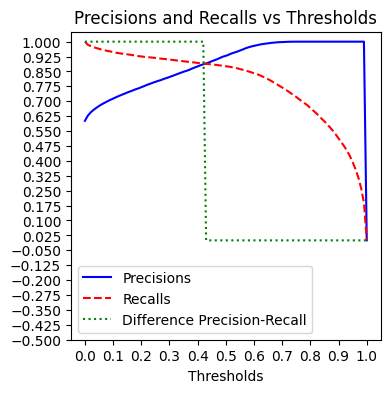

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))

plt.plot(df_scores['threshold'], df_scores['precision'], color='blue', linestyle='solid', label='Precisions')
plt.plot(df_scores['threshold'], df_scores['recall'], color='red', linestyle='dashed', label='Recalls')
plt.plot(df_scores['threshold'], df_scores['diff_prec_recall'], color='green', linestyle='dotted', label='Difference Precision-Recall')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(-0.5, 1, 21))

plt.xlabel('Thresholds')
plt.title('Precisions and Recalls vs Thresholds')

plt.show()

In [22]:
for i in range(1, len(df_scores)):
    if df_scores.iloc[i - 1]['diff_prec_recall'] != df_scores.iloc[i]['diff_prec_recall']:
        print(f'Precsion and recall curves intersect when threshold=`{df_scores.iloc[i]['threshold']:.3f}`')

Precsion and recall curves intersect when threshold=`0.430`


### F1 score

In [23]:
df_scores['f1_score'] = 2 * df_scores['precision'] * df_scores['recall'] / (df_scores['precision'] + df_scores['recall'])
df_scores['f1_score'].idxmax()

57

In [24]:
df_scores.iloc[df_scores['f1_score'].idxmax()]['threshold']

np.float64(0.5700000000000001)

##### F1 reached its maximum when threshold=0.57

In [25]:
from sklearn.model_selection import KFold
def LogisticRegression_auc(df_train, df_val, y_train, y_val, categoricals, numericals, c=1.0):

    # prepare train data
    train_dict = df_train[categoricals + numericals].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    # train the model
    X_train = dv.transform(train_dict)
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, class_weight='balanced', random_state=1)
    model.fit(X_train, y_train)
        
    # make predictions on train data
    y_train_pred = model.predict_proba(X_train)[:, 1]

    # prepare validation data
    val_dict = df_val[categoricals + numericals].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    # make predictions on validation data
    y_val_pred = model.predict_proba(X_val)[:, 1]

    # evaluate the model on train data and store the AUC score in a list
    train_auc = round(roc_auc_score(y_train, y_train_pred), 3)
    
    # evaluate the model on validation data and store the AUC score in a list
    val_auc = round(roc_auc_score(y_val, y_val_pred), 3)

    return train_auc, val_auc

# calculate the standard deviation of the AUC scores
# lr_train_auc, lr_val_auc = LogisticRegression_auc(df_train, df_val, y_train, y_val, categoricals, numericals)
# print(f'Train LogisticRegression AUC: {lr_train_auc}, val AUC: {lr_val_auc}')

### Hyperparameter Tuning for LogisticRegression

In [26]:
hyperparameters = np.arange(0.1, 0.4, 0.1)
lr_auc_score_hyperparamters = []

for c in hyperparameters:
    lr_train_auc, lr_val_auc = LogisticRegression_auc(df_train, df_val, y_train, y_val, categoricals, numericals, c=c)
    lr_auc_score_hyperparamters.append([c, [lr_train_auc], [lr_val_auc]])
    print(f'Finished for C={c}')

Finished for C=0.1
Finished for C=0.2
Finished for C=0.30000000000000004
Finished for C=0.4


In [27]:
df_lr_auc_score_hyperparamters = pd.DataFrame(lr_auc_score_hyperparamters, columns=['C', 'train_auc', 'val_auc'])
df_lr_auc_score_hyperparamters['train_auc'] = df_lr_auc_score_hyperparamters['train_auc'].apply(lambda x: np.mean(x))
df_lr_auc_score_hyperparamters['val_auc'] = df_lr_auc_score_hyperparamters['val_auc'].apply(lambda x: np.mean(x)) 
df_lr_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head() 

,C,train_auc,val_auc
1,0.2,0.934,0.933
2,0.3,0.934,0.933
3,0.4,0.934,0.933
0,0.1,0.933,0.932


#### Training SVM

In [28]:
from sklearn.svm import SVC
svm_en = 1 # 0: disable, 1: enable

In [29]:
def SVC_auc(df_train, df_val, y_train, y_val, categoricals, numericals, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0):

    # prepare train data
    train_dict = df_train[categoricals + numericals].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    # train the model
    X_train = dv.transform(train_dict)
    model = SVC(probability=True, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, class_weight='balanced', max_iter=-1, random_state=1)
    model.fit(X_train, y_train)
        
    # make predictions on train data
    y_train_pred = model.predict_proba(X_train)[:, 1]

    # prepare validation data
    val_dict = df_val[categoricals + numericals].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    # make predictions on validation data
    y_val_pred = model.predict_proba(X_val)[:, 1]

    # evaluate the model on train data and store the AUC score in a list
    train_auc = round(roc_auc_score(y_train, y_train_pred), 3)
    
    # evaluate the model on validation data and store the AUC score in a list
    val_auc = round(roc_auc_score(y_val, y_val_pred), 3)

    return train_auc, val_auc

# AUC scores
#if svm_en == 1:
#    svc_train_auc, svc_val_auc = SVC_auc(df_train, df_val, y_train, y_val, categoricals, numericals, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0)
#    print(f'Train SVC AUC: {svc_train_auc}, val AUC: {svc_val_auc}')

#### Hyperparameter tuning for SVM

In [30]:
C_range = [1.0] # range(0, 21, 20)
kernels = ['rbf', 'linear'] #, 'poly', 'sigmoid']
degrees = [3] # 2, 4] # valid for 'poly' kernel only
gammas = ['scale'] # , 'auto'] # valid for 'rbf', 'poly' and 'sigmoid' kernels only
coef0s = [0.0] # valid for 'poly' and 'sigmoid' kernels only
svc_auc_score_hyperparamters = []

if svm_en == 1:
	for c in C_range:
		for k in kernels:
			if k == 'poly':
				for d in degrees:
					for g in gammas:
						for co in coef0s:
							train_auc, val_auc = SVC_auc(df_train, df_val, y_train, y_val, categoricals, numericals, 
														C=c, kernel=k, degree=d, gamma=g, coef0=co)
							svc_auc_score_hyperparamters.append([c, k, d, g, co, train_auc, val_auc])
			elif k == 'sigmoid':
				for g in gammas:
					for co in coef0s:
						train_auc, val_auc = SVC_auc(df_train, df_val, y_train, y_val, categoricals, numericals, 
														C=c, kernel=k, degree=3, gamma=g, coef0=co)
						svc_auc_score_hyperparamters.append([c, k, 3, g, co, train_auc, val_auc])
			elif k == 'rbf':
				for g in gammas:
					train_auc, val_auc = SVC_auc(df_train, df_val, y_train, y_val, categoricals, numericals, 
														C=c, kernel=k, degree=3, gamma=g, coef0=0.0)
					svc_auc_score_hyperparamters.append([c, k, 3, g, 0.0, train_auc, val_auc])
			else:  # linear kernel
				
				train_auc, val_auc = SVC_auc(df_train, df_val, y_train, y_val, categoricals, numericals, 
														C=c, kernel=k, degree=3, gamma='scale', coef0=0.0)
				svc_auc_score_hyperparamters.append([c, k, 3, 'scale', 0.0, train_auc, val_auc])
			print(f'Completed C={c}, kernel={k}')

Completed C=1.0, kernel=rbf
Completed C=1.0, kernel=linear


In [31]:
df_svc_auc_score_hyperparamters = pd.DataFrame(svc_auc_score_hyperparamters, columns=['C', 'kernel', 'degree', 'gamma', 'coef0', 'train_auc', 'val_auc'])
df_svc_auc_score_hyperparamters['train_auc'] = df_svc_auc_score_hyperparamters['train_auc'].apply(lambda x: np.mean(x))
df_svc_auc_score_hyperparamters['val_auc'] = df_svc_auc_score_hyperparamters['val_auc'].apply(lambda x: np.mean(x)) 
df_svc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head() 

,C,kernel,degree,gamma,coef0,train_auc,val_auc
0,1.0,rbf,3,scale,0.0,0.913,0.912
1,1.0,linear,3,scale,0.0,0.913,0.912


#### Training DecisionTreeClassifier

##### `Feature importance analysis (EDA Part 7)`

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
dt = DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=1)
dt.fit(X_train, y_train)
print(export_text(dt, feature_names=dv.get_feature_names_out()))

df_feature_importance = pd.DataFrame({
    'feature': dv.get_feature_names_out(),
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=False)
df_feature_importance

|--- hba1c <= 6.49
|   |--- glucose_fasting <= 125.50
|   |   |--- family_history_diabetes=No <= 0.50
|   |   |   |--- class: 0
|   |   |--- family_history_diabetes=No >  0.50
|   |   |   |--- class: 0
|   |--- glucose_fasting >  125.50
|   |   |--- class: 1
|--- hba1c >  6.49
|   |--- sleep_hours_per_day <= 3.05
|   |   |--- class: 1
|   |--- sleep_hours_per_day >  3.05
|   |   |--- class: 1



,feature,importance
28,hba1c,9.661662e-01
26,glucose_fasting,3.239066e-02
21,family_history_diabetes=No,1.443141e-03
42,sleep_hours_per_day,6.450240e-13
4,cardiovascular_history=Yes,0.000000e+00
1,alcohol_consumption_per_week,0.000000e+00
2,bmi,0.000000e+00
3,cardiovascular_history=No,0.000000e+00
8,education_level=Graduate,0.000000e+00
9,education_level=Highschool,0.000000e+00


In [33]:
def DecisionTreeClassifier_auc(df_train, df_val, y_train, y_val, categoricals, numericals, maxDepth=10, minSamplesLeaf=5):

    # prepare train data
    train_dict = df_train[categoricals + numericals].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    # train the model
    X_train = dv.transform(train_dict)
    model = DecisionTreeClassifier(max_depth = maxDepth, min_samples_leaf = minSamplesLeaf, class_weight='balanced', random_state=1)
    model.fit(X_train, y_train)
        
    # make predictions on train data
    y_train_pred = model.predict_proba(X_train)[:, 1]

    # prepare validation data
    val_dict = df_val[categoricals + numericals].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    # make predictions on validation data
    y_val_pred = model.predict_proba(X_val)[:, 1]

    # evaluate the model on train data and store the AUC score in a list
    train_auc = round(roc_auc_score(y_train, y_train_pred), 3)
    
    # evaluate the model on validation data and store the AUC score in a list
    val_auc = round(roc_auc_score(y_val, y_val_pred), 3)

    return train_auc, val_auc

# calculate the standard deviation of the AUC scores
# dt_train_auc, dt_val_auc = DecisionTreeClassifier_auc(df_train, df_val, y_train, y_val, categoricals, numericals)
# print(f'train DecisionTreeClassifier AUC: {dt_train_auc}, val AUC: {dt_val_auc}')

#### Hyperparameter tuning for DecisionTreeClassifier

In [34]:
max_depth_range= range(1, 21, 10)
min_samples_leaf_range = range(7, 12, 2)
dtc_auc_score_hyperparamters = []

for maxD in max_depth_range:
    for minS in min_samples_leaf_range:
        train_auc, val_auc = DecisionTreeClassifier_auc(df_train, df_val, y_train, y_val, categoricals, numericals, maxDepth=maxD, minSamplesLeaf=minS)
        dtc_auc_score_hyperparamters.append([maxD, minS, train_auc, val_auc])
        print(f'Completed max_depth={maxD}, min_samples_leaf={minS}')

Completed max_depth=1, min_samples_leaf=7
Completed max_depth=1, min_samples_leaf=9
Completed max_depth=1, min_samples_leaf=11
Completed max_depth=11, min_samples_leaf=7
Completed max_depth=11, min_samples_leaf=9
Completed max_depth=11, min_samples_leaf=11


In [35]:
df_dtc_auc_score_hyperparamters = pd.DataFrame(dtc_auc_score_hyperparamters, columns=['max_depth', 'min_samples_leaf', 'train_auc', 'val_auc'])
df_dtc_auc_score_hyperparamters['train_auc'] = df_dtc_auc_score_hyperparamters['train_auc'].apply(lambda x: np.mean(x))
df_dtc_auc_score_hyperparamters['val_auc'] = df_dtc_auc_score_hyperparamters['val_auc'].apply(lambda x: np.mean(x)) 
df_dtc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head() 

,max_depth,min_samples_leaf,train_auc,val_auc
4,11,9,0.955,0.941
5,11,11,0.956,0.941
3,11,7,0.956,0.940
0,1,7,0.926,0.924
1,1,9,0.926,0.924


#### Training RandomForestRegressor

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
def RandomForestClassifier_auc(df_train, df_val, y_train, y_val, categoricals, numericals, nEstimators=100, maxDepth=10, minSamplesLeaf=5):

    # prepare train data
    train_dict = df_train[categoricals + numericals].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    # train the model
    X_train = dv.transform(train_dict)
    model = RandomForestClassifier(n_estimators=nEstimators, n_jobs=-1, max_depth=maxDepth, min_samples_leaf=minSamplesLeaf, class_weight='balanced', random_state=1)
    model.fit(X_train, y_train)
        
    # make predictions on train data
    y_train_pred = model.predict_proba(X_train)[:, 1]

    # prepare validation data
    val_dict = df_val[categoricals + numericals].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    # make predictions on validation data
    y_val_pred = model.predict_proba(X_val)[:, 1]

    # evaluate the model on train data and store the AUC score in a list
    train_auc = round(roc_auc_score(y_train, y_train_pred), 3)
    
    # evaluate the model on validation data and store the AUC score in a list
    val_auc = round(roc_auc_score(y_val, y_val_pred), 3)

    return train_auc, val_auc

# calculate the standard deviation of the AUC scores
# dt_train_auc, dt_val_auc = RandomForestClassifier_auc(df_train, df_val, y_train, y_val, categoricals, numericals)
# print(f'train RandomForestClassifier AUC: {dt_train_auc}, val AUC: {dt_val_auc}')

#### Hyperparameter tuning for RandomForestClassifier

In [38]:
n_estimators_range = range(1, 17, 5)
max_depth_range = range(7, 10, 1)
min_samples_leaf_range = range(6, 16, 5)
rfc_auc_score_hyperparamters = []

for nEs in n_estimators_range:
    for maxD in max_depth_range:
        for minS in min_samples_leaf_range:
            train_auc, val_auc = RandomForestClassifier_auc(df_train, df_val, y_train, y_val, categoricals, numericals, nEstimators= nEs, maxDepth=maxD, minSamplesLeaf=minS)
            rfc_auc_score_hyperparamters.append([nEs, maxD, minS, train_auc, val_auc])
    print(f'Completed n_estimators={nEs}, max_depth={maxD}, min_samples_leaf={minS}')

Completed n_estimators=1, max_depth=9, min_samples_leaf=11
Completed n_estimators=6, max_depth=9, min_samples_leaf=11
Completed n_estimators=11, max_depth=9, min_samples_leaf=11
Completed n_estimators=16, max_depth=9, min_samples_leaf=11


In [39]:
df_rfc_auc_score_hyperparamters = pd.DataFrame(rfc_auc_score_hyperparamters, columns=['n_estimators', 'max_depth', 'min_samples_leaf', 'train_auc', 'val_auc'])
df_rfc_auc_score_hyperparamters['train_auc'] = df_rfc_auc_score_hyperparamters['train_auc'].apply(lambda x: np.mean(x))
df_rfc_auc_score_hyperparamters['val_auc'] = df_rfc_auc_score_hyperparamters['val_auc'].apply(lambda x: np.mean(x)) 
df_rfc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head() 

,n_estimators,max_depth,min_samples_leaf,train_auc,val_auc
21,16,8,11,0.948,0.945
15,11,8,11,0.948,0.945
1,1,7,11,0.945,0.944
16,11,9,6,0.954,0.944
14,11,8,6,0.949,0.944


#### Training XGBClassifier model

In [40]:
import xgboost as xgb
from xgboost import XGBClassifier

In [41]:
def XGBoostClassifier_auc(df_train, df_val, y_train, y_val, categoricals, numericals, learningRate=0.1, maxDepth=6, regLambda=1.0):

    # prepare train data
    train_dict = df_train[categoricals + numericals].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    # train the model
    X_train = dv.transform(train_dict)
    model = XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        learning_rate=learningRate,
        max_depth=maxDepth,
        min_child_weight=1,
        gamma=0,
        reg_lambda=regLambda,
        random_state=1,
        n_jobs=-1,
        n_estimators=100,
        scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum()
    )
    model.fit(X_train, y_train)
        
    # make predictions on train data
    y_train_pred = model.predict_proba(X_train)[:, 1]

    # prepare validation data
    val_dict = df_val[categoricals + numericals].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    # make predictions on validation data
    y_val_pred = model.predict_proba(X_val)[:, 1]

    # evaluate the model on train data and store the AUC score in a list
    train_auc = round(roc_auc_score(y_train, y_train_pred), 3)
    
    # evaluate the model on validation data and store the AUC score in a list
    val_auc = round(roc_auc_score(y_val, y_val_pred), 3)

    return train_auc, val_auc

# calculate the standard deviation of the AUC scores
# dt_train_auc, dt_val_auc = XGBoostClassifier_auc(df_train, df_val, y_train, y_val, categoricals, numericals)
# print(f'train XGBoostClassifier AUC: {dt_train_auc}, val  AUC: {dt_val_auc}')

#### Hyperparameter tuning for XGBoostClassifier

In [42]:
learning_rate_range = np.arange(0.1, 0.3, 0.1)
max_depth_range = range(1, 3, 1)
reg_lambda_range = np.arange(0.5, 1.6, 0.5)
xgc_auc_score_hyperparamters = []

for eta in learning_rate_range:
    for maxD in max_depth_range:
        for regL in reg_lambda_range:
            train_auc, val_auc = XGBoostClassifier_auc(df_train, df_val, y_train, y_val, categoricals, numericals, learningRate=eta, maxDepth=maxD, regLambda=regL)
            xgc_auc_score_hyperparamters.append([eta, maxD, regL, train_auc, val_auc])
    print(f'Completed learning_rate={eta}, max_depth={maxD}, reg_lambda={regL}')

Completed learning_rate=0.1, max_depth=2, reg_lambda=1.5
Completed learning_rate=0.2, max_depth=2, reg_lambda=1.5


In [43]:
df_xgc_auc_score_hyperparamters = pd.DataFrame(xgc_auc_score_hyperparamters, columns=['learning_rate', 'max_depth', 'reg_lambda', 'train_auc', 'val_auc'])
df_xgc_auc_score_hyperparamters['train_auc'] = df_xgc_auc_score_hyperparamters['train_auc'].apply(lambda x: np.mean(x))
df_xgc_auc_score_hyperparamters['val_auc'] = df_xgc_auc_score_hyperparamters['val_auc'].apply(lambda x: np.mean(x))
df_xgc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head()

,learning_rate,max_depth,reg_lambda,train_auc,val_auc
3,0.1,2,0.5,0.948,0.947
6,0.2,1,0.5,0.947,0.947
5,0.1,2,1.5,0.948,0.947
4,0.1,2,1.0,0.948,0.947
8,0.2,1,1.5,0.947,0.947


#### AUC summary for all the five models

In [44]:
print('Logistic Regression:')
display(df_lr_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head(1))

print('SVM:')
display(df_svc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head(1))

print('Decision Tree Classifier:')
display(df_dtc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head(1))

print('Random Forest Classifier:')
display(df_rfc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head(1))

print('XGBoost Classifier:')
display(df_xgc_auc_score_hyperparamters.sort_values(by='val_auc', ascending=False).head(1))

Logistic Regression:


,C,train_auc,val_auc
1,0.2,0.934,0.933


SVM:


,C,kernel,degree,gamma,coef0,train_auc,val_auc
0,1.0,rbf,3,scale,0.0,0.913,0.912


Decision Tree Classifier:


,max_depth,min_samples_leaf,train_auc,val_auc
4,11,9,0.955,0.941


Random Forest Classifier:


,n_estimators,max_depth,min_samples_leaf,train_auc,val_auc
21,16,8,11,0.948,0.945


XGBoost Classifier:


,learning_rate,max_depth,reg_lambda,train_auc,val_auc
3,0.1,2,0.5,0.948,0.947


### XGBoost Classifier with `learning_rate=0.1, max_depth=2, reg_lambda=0.5` achieves the best of AUC score within validation dataset. Let's train it with full training data, save it, and deploy it.

#### Save model for deployment

In [45]:
def train(df, y, C=1.0):
    train_dict = df[categoricals + numericals].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X = dv.transform(train_dict)
    model = XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        learning_rate=0.1,
        max_depth=2,
        min_child_weight=1,
        gamma=0,
        reg_lambda=0.5,
        random_state=1,
        n_jobs=-1,
        n_estimators=100,
        scale_pos_weight= (y_train == 0).sum() / (y_train == 1).sum()
    )
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    val_dict = df[categoricals + numericals].to_dict(orient='records')
    
    X = dv.transform(val_dict)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [46]:
df_test.columns

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c'],
      dtype='object')

In [49]:
dv, model = train(df_train_full, y_train, C=0.9)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %f' % auc)

auc = 0.948935
